### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
print(tf. __version__)
from google.colab import drive
drive.mount('/content/drive')


2.18.0
Mounted at /content/drive


### Defining the path of dataset directory

In [ ]:
dataset_path = "/content/drive/My Drive/AIML/Plant-Disease-Detection/DataSet"

### Visualizing the images and Resize images

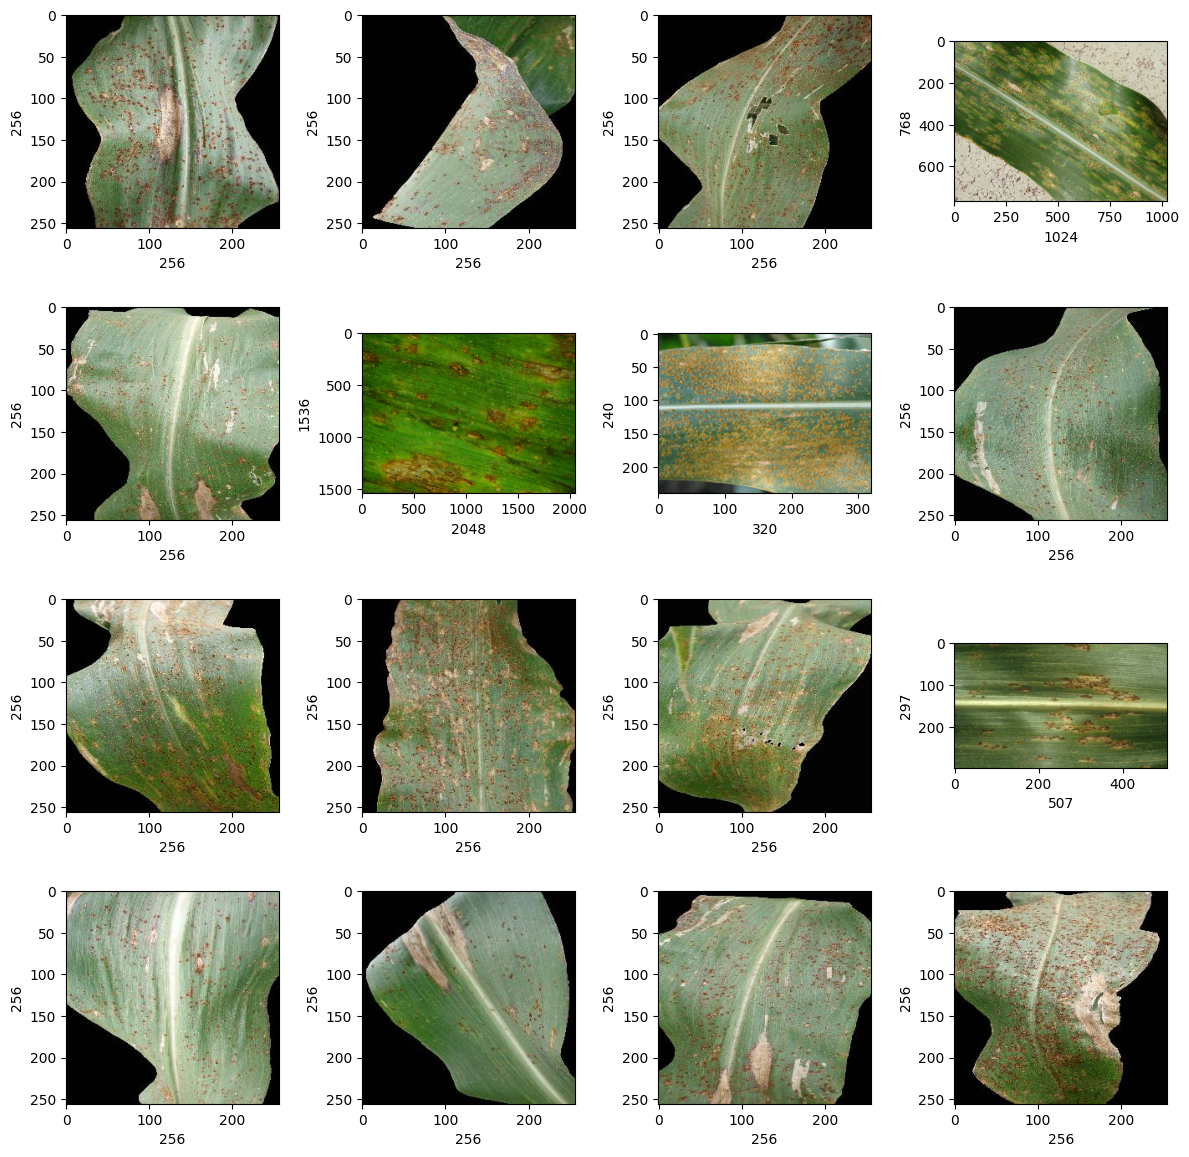

In [ ]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = "/content/drive/My Drive/AIML/Plant-Disease-Detection/DataSet/Corn__Common_Rust"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

### Convert the images into a Numpy array and normalize them

In [ ]:
# Converting Images to array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dataset_path = r"/content/drive/My Drive/AIML/Plant-Disease-Detection/DataSet"
labels = os.listdir(dataset_path)

print(labels)

['Corn__Common_Rust', 'Potato___Early_blight', 'Tomato___Bacterial_spot']


In [ ]:
dataset_path = r"/content/drive/My Drive/AIML/Plant-Disease-Detection/DataSet"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Corn__Common_Rust', 'Potato-Early_blight', 'Tomato__Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

### Visualize the class count and Check for class imbalance

In [ ]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
2,310
0,300
1,300


In [ ]:
# it is a balanced dataset as we can see

In [ ]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [ ]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(910,)

### Splitting the dataset into train, validate and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Creating the model architecture, compile the model and then fit it using the training data

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [ ]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [ ]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.4141 - loss: 1.0591 - val_accuracy: 0.7329 - val_loss: 0.9463
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.7933 - loss: 0.9151 - val_accuracy: 0.8904 - val_loss: 0.8054
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.8686 - loss: 0.7803 - val_accuracy: 0.8699 - val_loss: 0.6849
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.8634 - loss: 0.6702 - val_accuracy: 0.8973 - val_loss: 0.5666
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.8824 - loss: 0.5632 - val_accuracy: 0.9110 - val_loss: 0.4883
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.8788 - loss: 0.5063 - val_accuracy: 0.9041 - val_loss: 0.4114
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.8861 - loss: 0.4324 - val_accuracy: 0.9110 - val_loss: 0.3685
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9145 - loss: 0.3811 - val_accuracy: 0.9247 - val_loss: 0.3176
Epoch 9/

In [ ]:
model.save("/content/drive/My Drive/Plant-Disease-Detection/Model/plant_disease_model.h5")

### Plot the accuracy and loss against each epoch

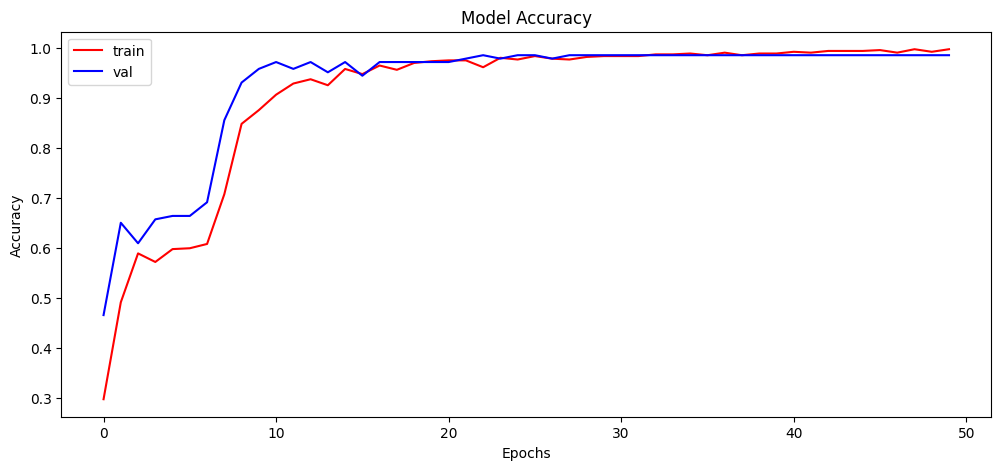

In [ ]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.9807 - loss: 0.0591
Test Accuracy: 98.35164546966553


### Make predictions on testing data

In [ ]:
y_pred = model.predict(x_test)

NameError: name 'model' is not defined

### Visualizing the original and predicted labels for the test images

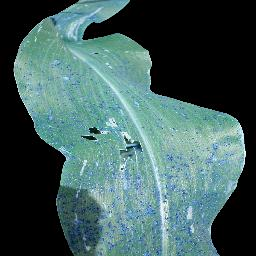

In [ ]:
# Plotting image to compare

img = array_to_img(x_test[22])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
[0.00136392 0.93208414 0.06655193]


In [ ]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Potato-Early_blight   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Potato-Early_blight   Corn__Common_Rust
Corn__Common_Rust   Corn__Common_Rust
Tomato__Bacterial_spot   Corn__Common_Rust
Potato-Early_blight   Corn__Commo